In [1]:
import skfuzzy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

**DATA2.CSV**

In [2]:
### read file from csv - part
df = pd.read_csv('data2.csv')
df

,X,Y,Class
0,-0.842046,0.408155,0
1,0.096394,-0.852114,1
2,-0.964828,0.034454,0
3,-0.164699,0.817332,1
4,0.274231,0.756343,1
...,...,...,...
295,-0.526197,0.815028,0
296,0.832952,0.086819,1
297,-0.900569,-0.555313,0
298,-0.534179,-0.513472,1


In [3]:
## Source = https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

## Normalize X,Y - using MaxMinScaler

# df[['X','Y']]
scaler = MinMaxScaler()
scaler.fit(df[['X','Y']])
df[['X', 'Y']] = scaler.transform(df[['X', 'Y']])
df


,X,Y,Class
0,0.111887,0.695514,0
1,0.553537,0.094573,1
2,0.054103,0.517320,0
3,0.430661,0.890623,1
4,0.637230,0.861541,1
...,...,...,...
295,0.260532,0.889525,0
296,0.900176,0.542289,1
297,0.084345,0.236098,0
298,0.256775,0.256050,1


In [4]:
## FCM algorithm

def fcm_algorithm(data , c):
    cntr, u, u0, d, jm, p, fpc = skfuzzy.cluster.cmeans(data.T, c, 2, error=0.005, maxiter=1000, init=None)

    cluster_membership = np.argmax(u, axis=0)
    fig, ax = plt.subplots()
    
    # Plotting the data points for each cluster
    for i in range(c):
        ax.plot(data[cluster_membership == i, 0], data[cluster_membership == i, 1], 'o', label=f'Cluster {i + 1}')

    # Plotting the cluster centers with their own colors and labels
    for i, cluster_center in enumerate(cntr):
        ax.plot(cluster_center[0], cluster_center[1], '*', markersize=15, markeredgewidth=2, color=f'C{i}', label=f'Centroid {i + 1}')

    ax.set_title(f'Fuzzy C-Means Clustering with c= {c}')
    leg = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the layout to make space for the legend
    plt.show()
    return fpc

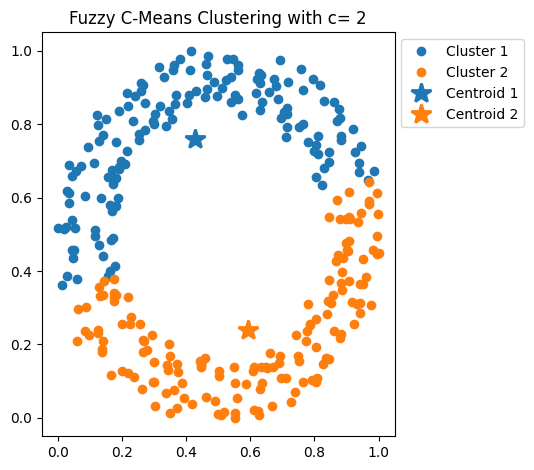

FPC :  0.7065605579338753

 --------------------------------------------- 



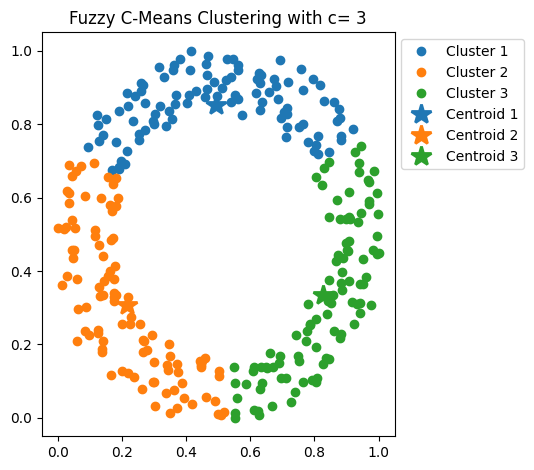

FPC :  0.6774132934880551

 --------------------------------------------- 



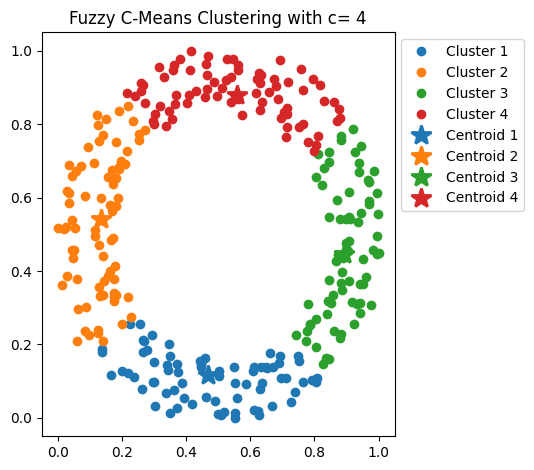

FPC :  0.660349779856448

 --------------------------------------------- 



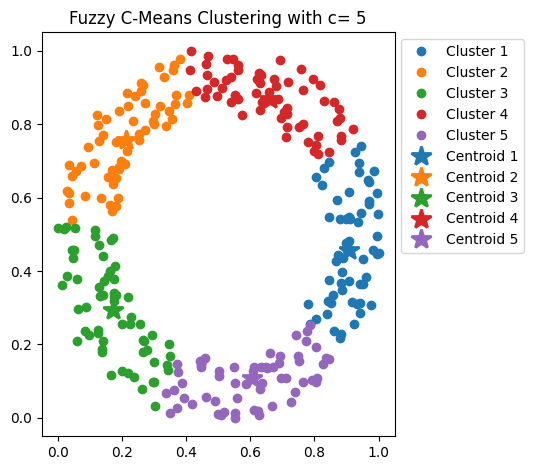

FPC :  0.6500469848122769

 --------------------------------------------- 



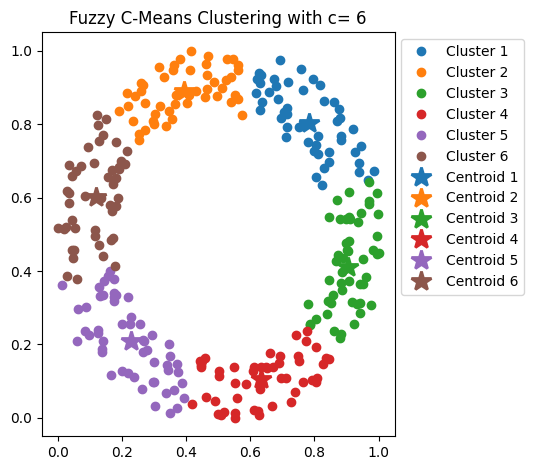

FPC :  0.6322102441470961

 --------------------------------------------- 



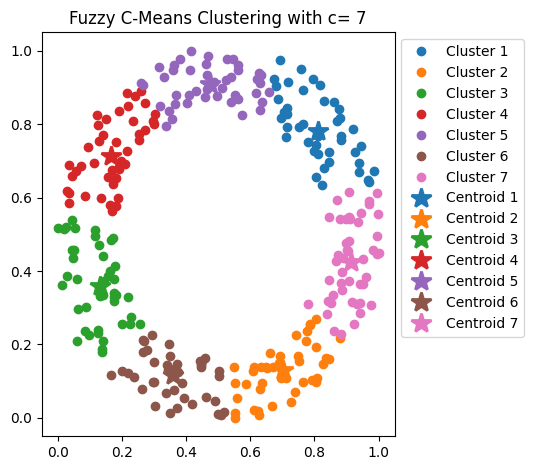

FPC :  0.6229923236515456

 --------------------------------------------- 



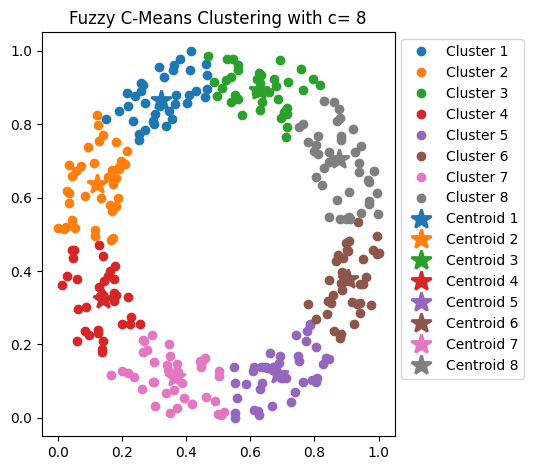

FPC :  0.6117857040637894

 --------------------------------------------- 



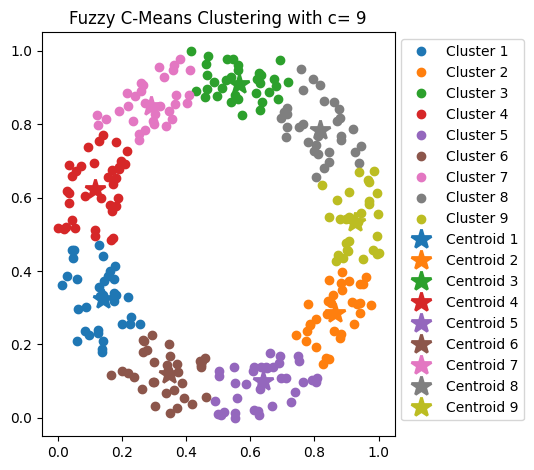

FPC :  0.5955529473707516

 --------------------------------------------- 



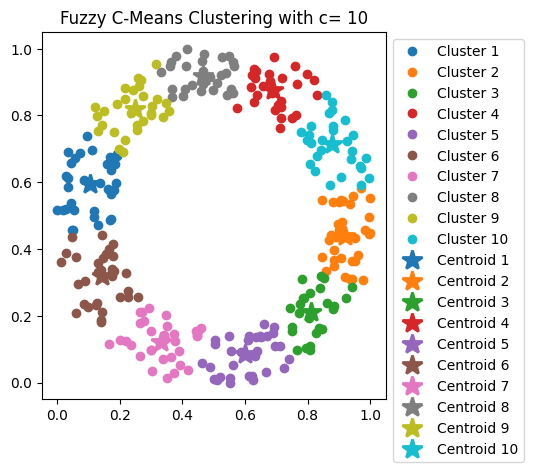

FPC :  0.5753331163381445

 --------------------------------------------- 



In [5]:
## running FCM algorithm in range of 2 to 10
data = df[['X', 'Y']].values
fpcs = []
for c in range(2, 11):
    fpc = fcm_algorithm(data, c)
    print("FPC : ",fpc)
    fpcs.append(fpc)
    print('\n --------------------------------------------- \n')

**FPC Graph**

Text(0, 0.5, 'Fuzzy partition coefficient')

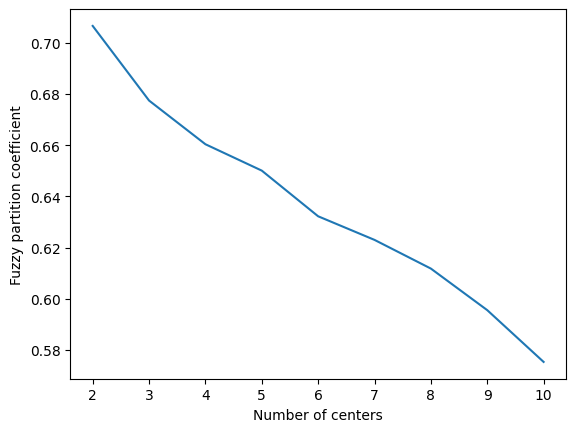

In [6]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")